# Dates and Times in Python

See appendix a of "Python for Finance, 2nd Edition",  Hilpisch O'Reilly

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import datetime as dt

## Extracting values from a datetime variable

In [2]:
dt.datetime.now()

datetime.datetime(2024, 2, 27, 19, 29, 32, 48551)

In [3]:
to2=dt.datetime.today()
to2

datetime.datetime(2024, 2, 27, 19, 29, 32, 90245)

In [4]:
type(to2)

datetime.datetime

In [6]:
dir(to2)

['__add__',
 '__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__ne__',
 '__new__',
 '__radd__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rsub__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 'astimezone',
 'combine',
 'ctime',
 'date',
 'day',
 'dst',
 'fold',
 'fromisocalendar',
 'fromisoformat',
 'fromordinal',
 'fromtimestamp',
 'hour',
 'isocalendar',
 'isoformat',
 'isoweekday',
 'max',
 'microsecond',
 'min',
 'minute',
 'month',
 'now',
 'replace',
 'resolution',
 'second',
 'strftime',
 'strptime',
 'time',
 'timestamp',
 'timetuple',
 'timetz',
 'today',
 'toordinal',
 'tzinfo',
 'tzname',
 'utcfromtimestamp',
 'utcnow',
 'utcoffset',
 'utctimetuple',
 'weekday',
 'year']

In [8]:
to2.day

27

In [9]:
to2.month

2

In [10]:
to2.year

2024

In [11]:
to2.weekday()

1

In [12]:
str(to2)

'2024-02-27 19:29:32.090245'

In [13]:
print(to2)

2024-02-27 19:29:32.090245


In [14]:
to2.hour

19

In [15]:
to2.time()

datetime.time(19, 29, 32, 90245)

In [16]:
to2.date()

datetime.date(2024, 2, 27)

In [17]:
# ordinal???  This is the day count from 01/01/10

to2.toordinal()

738943

In [18]:
dt.datetime.fromordinal(738210)

datetime.datetime(2022, 2, 24, 0, 0)

In [19]:
# conversion of a datatime to a string is done using strftime,  with the data and a conversion format string that allows 
# extraction of various forms of the date and/or time

dt.datetime.strftime(to2,"%m %b %Y")

'02 Feb 2024'

In [20]:
dt.datetime.strftime(to2,"%a %m %b %Y")

'Tue 02 Feb 2024'

In [21]:
dt.datetime.strftime(to2,"%a")

'Tue'

In [22]:
dt.datetime.strftime(to2,"%A")

'Tuesday'

## Setting up date times

In [23]:
# the strptime function converts text strings into dates
#

dt.datetime.strptime('Jun 1 2005  1:33PM', '%b %d %Y %I:%M%p')

datetime.datetime(2005, 6, 1, 13, 33)

In [24]:
dt.datetime.strptime("12 Feb 2022","%d %b %Y")

datetime.datetime(2022, 2, 12, 0, 0)

# timedelta objects are differences between times

In [25]:
td=dt.datetime.now()-to2

In [26]:
td

datetime.timedelta(seconds=108, microseconds=248120)

In [27]:
type(td)

datetime.timedelta

In [28]:
td.seconds

108

In [29]:
td.days

0

## Different time zones can be handled using the pytz package - it looks straightforward if you ever need it.



In [30]:
# Numpy Dates and Times

nd = np.datetime64('2020-10-31')
nd

numpy.datetime64('2020-10-31')

In [31]:
np.datetime_as_string(nd)


'2020-10-31'

In [32]:
# convert np datetime64 to datetime

nd.astype(dt.datetime)

datetime.date(2020, 10, 31)

In [33]:
# using np.arange to get ranges of dates
# daily freguency
np.arange('2020-01-01', '2020-01-04', dtype='datetime64')

array(['2020-01-01', '2020-01-02', '2020-01-03'], dtype='datetime64[D]')

In [34]:
# weekly frequency
np.arange('2020-01-01', '2020-10-01', dtype='datetime64[W]')[:10]

array(['2019-12-26', '2020-01-02', '2020-01-09', '2020-01-16',
       '2020-01-23', '2020-01-30', '2020-02-06', '2020-02-13',
       '2020-02-20', '2020-02-27'], dtype='datetime64[W]')

In [35]:
#Yearly frequency
np.arange('2000-01-01', '2020-10-01', dtype='datetime64[Y]')[:10]

array(['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009'], dtype='datetime64[Y]')

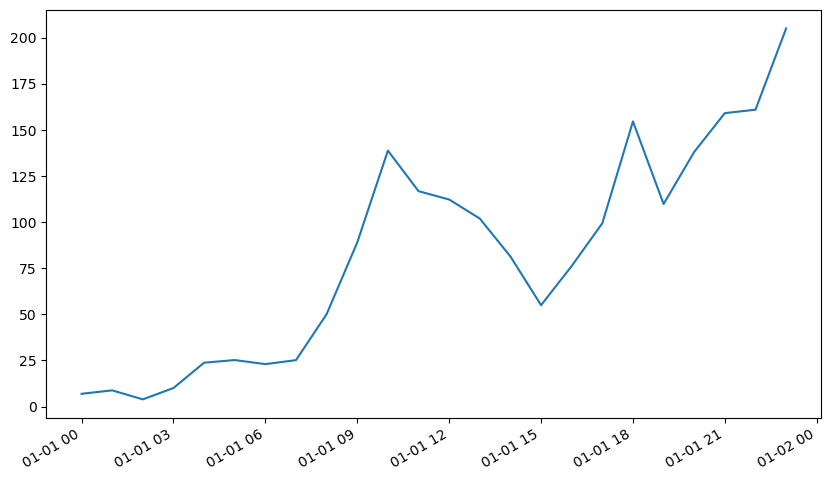

In [36]:
# plotting time series
# note the need to convert from an np datetime64 to a datetime

import matplotlib.pyplot as plt
%matplotlib inline

dtl = np.arange('2020-01-01T00:00:00', '2020-01-02T00:00:00',dtype='datetime64[h]') 

np.random.seed(3000)
rnd = np.random.standard_normal(len(dtl)).cumsum() ** 2

fig = plt.figure(figsize=(10, 6))
plt.plot(dtl.astype(dt.datetime), rnd)  
fig.autofmt_xdate();

In [37]:
# Pandas and yet another time variable type

Pandas has a timestamp variable type

SyntaxError: invalid syntax (3418453730.py, line 3)

In [38]:
ts=pd.Timestamp('2020-06-30')

In [39]:
ts

Timestamp('2020-06-30 00:00:00')

In [40]:
type(ts)

pandas._libs.tslibs.timestamps.Timestamp

In [41]:
dts=ts.to_pydatetime()
dts

datetime.datetime(2020, 6, 30, 0, 0)

In [42]:
# convert a datetime to a pd timestamp
pd.Timestamp(to2)

Timestamp('2024-02-27 19:29:32.090245')

In [43]:
# convert a numpy datetime64 to a pd timestamp

nd = np.datetime64('2020-10-31')

pd.Timestamp(nd)

Timestamp('2020-10-31 00:00:00')

In [44]:
# datetimeindex class in pandas

# this is a class meant to be used as an index for a pandas series or dataframe, that allows for a time-based index
# this is helpful for time series analysis

# there are tools to create these with different intervals and lengths

dti = pd.date_range('2020/01/01', freq='M', periods=12)  
dti

DatetimeIndex(['2020-01-31', '2020-02-29', '2020-03-31', '2020-04-30',
               '2020-05-31', '2020-06-30', '2020-07-31', '2020-08-31',
               '2020-09-30', '2020-10-31', '2020-11-30', '2020-12-31'],
              dtype='datetime64[ns]', freq='M')

In [45]:
dti[6]

Timestamp('2020-07-31 00:00:00')

In [46]:
# conversion of pandas datatimeindex to datetime
pdi = dti.to_pydatetime()  
pdi

array([datetime.datetime(2020, 1, 31, 0, 0),
       datetime.datetime(2020, 2, 29, 0, 0),
       datetime.datetime(2020, 3, 31, 0, 0),
       datetime.datetime(2020, 4, 30, 0, 0),
       datetime.datetime(2020, 5, 31, 0, 0),
       datetime.datetime(2020, 6, 30, 0, 0),
       datetime.datetime(2020, 7, 31, 0, 0),
       datetime.datetime(2020, 8, 31, 0, 0),
       datetime.datetime(2020, 9, 30, 0, 0),
       datetime.datetime(2020, 10, 31, 0, 0),
       datetime.datetime(2020, 11, 30, 0, 0),
       datetime.datetime(2020, 12, 31, 0, 0)], dtype=object)

In [47]:
# conversion of a datetime to a pandas datetimeindex

pd.DatetimeIndex(pdi)

DatetimeIndex(['2020-01-31', '2020-02-29', '2020-03-31', '2020-04-30',
               '2020-05-31', '2020-06-30', '2020-07-31', '2020-08-31',
               '2020-09-30', '2020-10-31', '2020-11-30', '2020-12-31'],
              dtype='datetime64[ns]', freq=None)

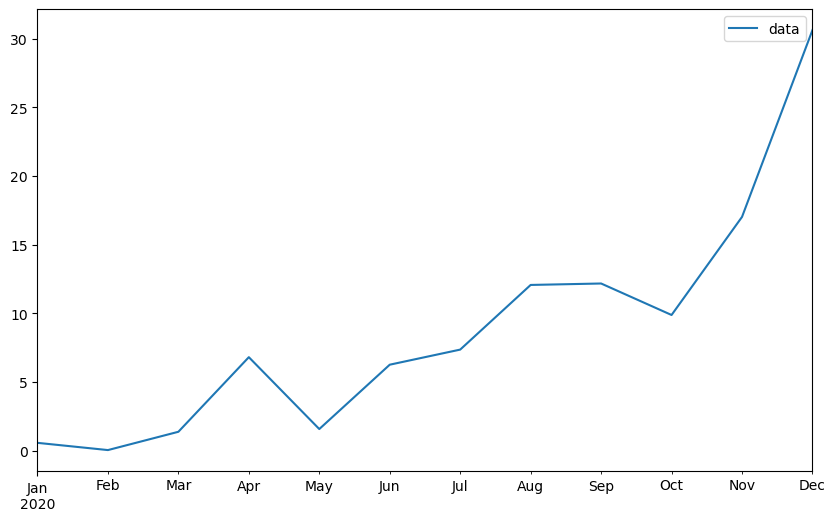

In [48]:
#below, the dti index set up above is set up as the row index, with random data in the data column,   and this is plotted

rnd = np.random.standard_normal(len(dti)).cumsum() ** 2

df = pd.DataFrame(rnd, columns=['data'], index=dti)

df.plot(figsize=(10, 6));

# So just what all do with have here?

python- datetime
        timedelta
    
numpy- datetime64
       -timedelta64-   the time change in numpy

pandas - timestamp
       - datetimeindex
    


In [49]:
## More time related tools in pandas

In [50]:
dti = pd.date_range("2018-01-01", periods=3, freq="H")
dti

DatetimeIndex(['2018-01-01 00:00:00', '2018-01-01 01:00:00',
               '2018-01-01 02:00:00'],
              dtype='datetime64[ns]', freq='H')

In [52]:
#time zone conversion
dti = dti.tz_localize("UTC")
dti

DatetimeIndex(['2018-01-01 00:00:00+00:00', '2018-01-01 01:00:00+00:00',
               '2018-01-01 02:00:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='H')

In [53]:
dti.tz_convert("US/Pacific")

DatetimeIndex(['2017-12-31 16:00:00-08:00', '2017-12-31 17:00:00-08:00',
               '2017-12-31 18:00:00-08:00'],
              dtype='datetime64[ns, US/Pacific]', freq='H')

In [54]:
# resampling a time series

idx = pd.date_range("2018-01-01", periods=5, freq="H")

ts = pd.Series(range(len(idx)), index=idx)

ts

2018-01-01 00:00:00    0
2018-01-01 01:00:00    1
2018-01-01 02:00:00    2
2018-01-01 03:00:00    3
2018-01-01 04:00:00    4
Freq: H, dtype: int64

In [55]:
# here is a resampling to a 2 hour interval

ts.resample("2H").mean()

2018-01-01 00:00:00    0.5
2018-01-01 02:00:00    2.5
2018-01-01 04:00:00    4.0
Freq: 2H, dtype: float64

In [56]:
friday = pd.Timestamp("2018-01-05")
friday.day_name()


'Friday'

In [57]:
# Add 1 day
saturday = friday + pd.Timedelta("1 day")

saturday.day_name()

'Saturday'

In [58]:

# Add 1 business day (Friday --> Monday)
monday = friday + pd.offsets.BDay()

monday.day_name()


'Monday'

Pandas has 4 different types of time related variables,  most in both scalar and vector form

Date times      Timestamp or DateTimeIndex

time deltas     Timedelta or TimeDeltaIndex

Time spans      Period  or PeriodIndex

Dae offets      DateOffset

In [60]:
# series elements are easily used to represent time series

pd.Series(range(3), index=pd.date_range("2000", freq="D", periods=3))

2000-01-01    0
2000-01-02    1
2000-01-03    2
Freq: D, dtype: int64

In [61]:
# but a series could be a series of dates

pd.Series(pd.date_range("2000", freq="D", periods=3))

0   2000-01-01
1   2000-01-02
2   2000-01-03
dtype: datetime64[ns]

In [62]:
pd.Series(pd.period_range("1/1/2011", freq="M", periods=3))

0    2011-01
1    2011-02
2    2011-03
dtype: period[M]

In [63]:
pd.Series([pd.DateOffset(1), pd.DateOffset(2)])


0         <DateOffset>
1    <2 * DateOffsets>
dtype: object

In [64]:
pd.Series(pd.date_range("1/1/2011", freq="M", periods=3))

0   2011-01-31
1   2011-02-28
2   2011-03-31
dtype: datetime64[ns]